# This notebook presents several ideas of a technical approach to conducting stock price analysis.

## Imports and setup

In [1]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

In [3]:
start = datetime(2019, 1, 1)
end = datetime.today()

Let's select a few NYSE tickers in the form of a dictionary, which will be loaded into yfinance.

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [5]:
df = yf.download(tickers, start, end, group_by='ticker')

[*********************100%%**********************]  6 of 6 completed


In [6]:
df.tail()

Ticker            WFC                                                        \
Price            Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2024-04-22  60.400002  61.490002  60.340000  61.099998  61.099998  21753400   
2024-04-23  61.169998  61.759998  60.810001  60.939999  60.939999  21731200   
2024-04-24  60.599998  60.950001  60.049999  60.599998  60.599998  19731600   
2024-04-25  60.610001  60.959999  59.599998  59.930000  59.930000  24002500   
2024-04-26  59.779999  60.430000  59.380001  59.910000  59.910000  17851400   

Ticker             MS                                   ...          GS  \
Price            Open       High        Low      Close  ...         Low   
Date                                                    ...               
2024-04-22  91.110001  92.660004  90.709999  92.089996  ...  404.570007   
2024-04-23  92.160004  94.050003  92.160004  93.760002  ...  416.200012   
2024-04-24  93.110001  94.070000  93.029999  93.849998  ...  419.609985   
2024-04-25  93.000000  93.650002  91.650002  92.559998  ...  414.850006   
2024-04-26  92.500000  93.309998  92.400002  92.830002  ...  419.640015   

Ticker                                             BAC                        \
Price            Close   Adj Close   Volume       Open       High        Low   
Date                                                                           
2024-04-22  417.350006  417.350006  4165600  37.000000  37.910000  36.869999   
2024-04-23  424.000000  424.000000  2662300  37.939999  38.419998  37.830002   
2024-04-24  423.040009  423.040009  1575900  38.020000  38.490002  38.000000   
2024-04-25  420.049988  420.049988  1970100  37.930000  38.270000  37.380001   
2024-04-26  427.570007  427.570007  2317000  37.930000  38.310001  37.779999   

Ticker                                      
Price           Close  Adj Close    Volume  
Date                                        
2024-04-22  37.730000  37.730000  43867100  
2024-04-23  38.369999  38.369999  39180300  
2024-04-24  38.320000  38.320000  28670600  
2024-04-25  37.910000  37.910000  41116000  
2024-04-26  37.830002  37.830002  28515100  

[5 rows x 36 columns]

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1339 entries, 2019-01-02 to 2024-04-26
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (WFC, Open)       1339 non-null   float64
 1   (WFC, High)       1339 non-null   float64
 2   (WFC, Low)        1339 non-null   float64
 3   (WFC, Close)      1339 non-null   float64
 4   (WFC, Adj Close)  1339 non-null   float64
 5   (WFC, Volume)     1339 non-null   int64  
 6   (MS, Open)        1339 non-null   float64
 7   (MS, High)        1339 non-null   float64
 8   (MS, Low)         1339 non-null   float64
 9   (MS, Close)       1339 non-null   float64
 10  (MS, Adj Close)   1339 non-null   float64
 11  (MS, Volume)      1339 non-null   int64  
 12  (C, Open)         1339 non-null   float64
 13  (C, High)         1339 non-null   float64
 14  (C, Low)          1339 non-null   float64
 15  (C, Close)        1339 non-null   float64
 16  (C, Adj Close)    1339 n

# Explanatory data analysis

Let's remove unwanted columns and check the maximum historical price of the selected stocks.

In [8]:
df.xs(key='Close', axis='columns', level='Price').max()

Ticker
WFC     61.099998
MS     108.730003
C       81.910004
JPM    200.300003
GS     427.570007
BAC     49.380001
dtype: float64

In [9]:
dfClose = df.xs(key='Close', axis='columns', level='Price')
dfClose.tail()

Ticker,WFC,MS,C,JPM,GS,BAC
Date,,,,,,
2024-04-22,61.099998,92.089996,60.950001,189.410004,417.350006,37.730000
2024-04-23,60.939999,93.760002,62.669998,192.139999,424.000000,38.369999
2024-04-24,60.599998,93.849998,62.470001,193.080002,423.040009,38.320000
2024-04-25,59.930000,92.559998,61.790001,193.369995,420.049988,37.910000
2024-04-26,59.910000,92.830002,62.660000,193.490005,427.570007,37.830002


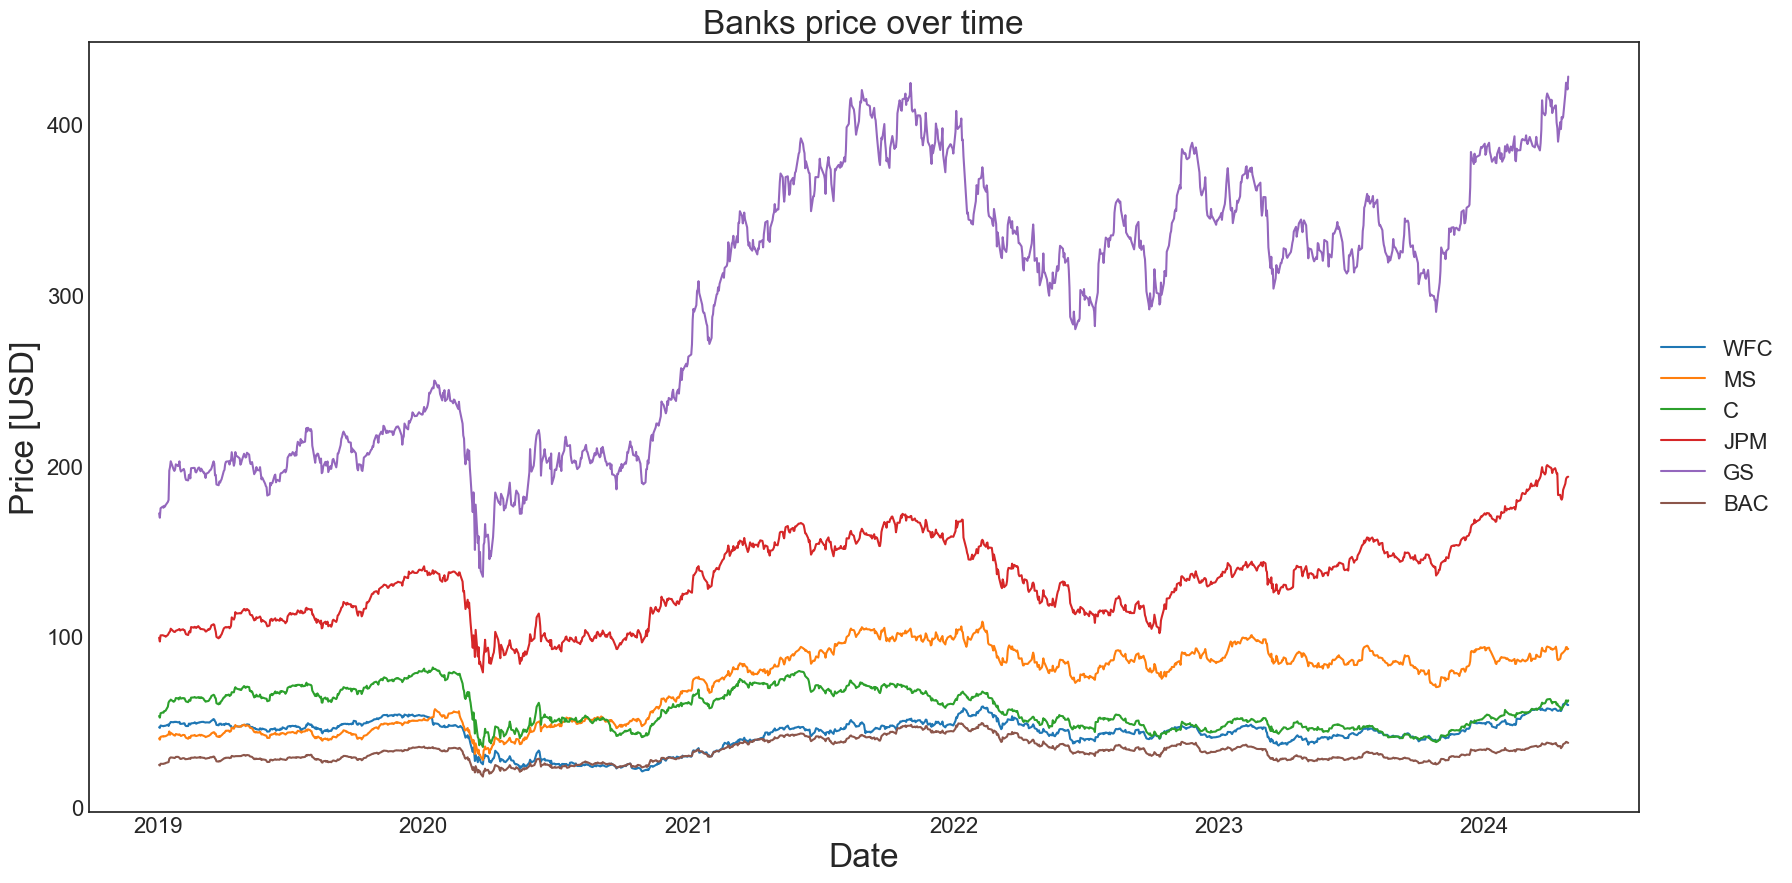

In [10]:
fig, axes = plt.subplots(figsize=(20,10))

axes.plot(dfClose)
axes.set_xlabel('Date', fontsize=24)
axes.set_ylabel('Price [USD]', fontsize=24)
axes.set_title('Banks price over time', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(labels=dfClose.columns, loc='center right', bbox_to_anchor=(1.1, 0.5), fontsize=16)

plt.show()

In [11]:
dfReturns = df.xs(key='Close', axis='columns', level='Price').pct_change()

dfReturnsColNames = {
    'GS': 'GS Return',
    'WFC': 'WFC Return',
    'MS': 'MS Return',
    'C': 'C Return',
    'BAC': 'BAC Return',
    'JPM': 'JPM Return'
}

dfReturns.rename(columns=dfReturnsColNames, inplace=True)

In [12]:
dfReturns.fillna(0, inplace=True)
dfReturns.iloc[:2]

Ticker,WFC Return,MS Return,C Return,JPM Return,GS Return,BAC Return
Date,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.007882,-0.017822,-0.018121,-0.022153,-0.014649,-0.016026


In [13]:
dfReturns.iloc[-2:]

Ticker,WFC Return,MS Return,C Return,JPM Return,GS Return,BAC Return
Date,,,,,,
2024-04-25,-0.011056,-0.013745,-0.010885,0.001502,-0.007068,-0.010699
2024-04-26,-0.000334,0.002917,0.014080,0.000621,0.017903,-0.002110


<Axes: ylabel='Frequency'>

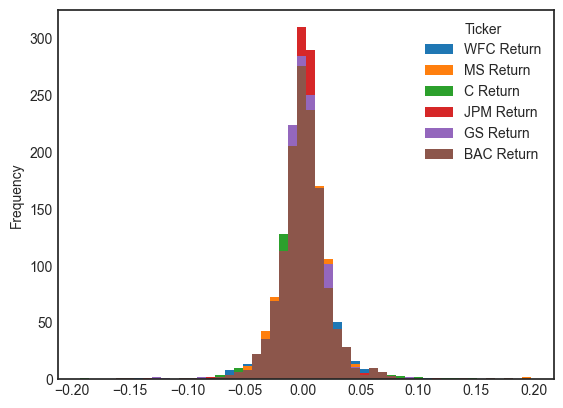

In [14]:
dfReturns.plot.hist(bins=50)

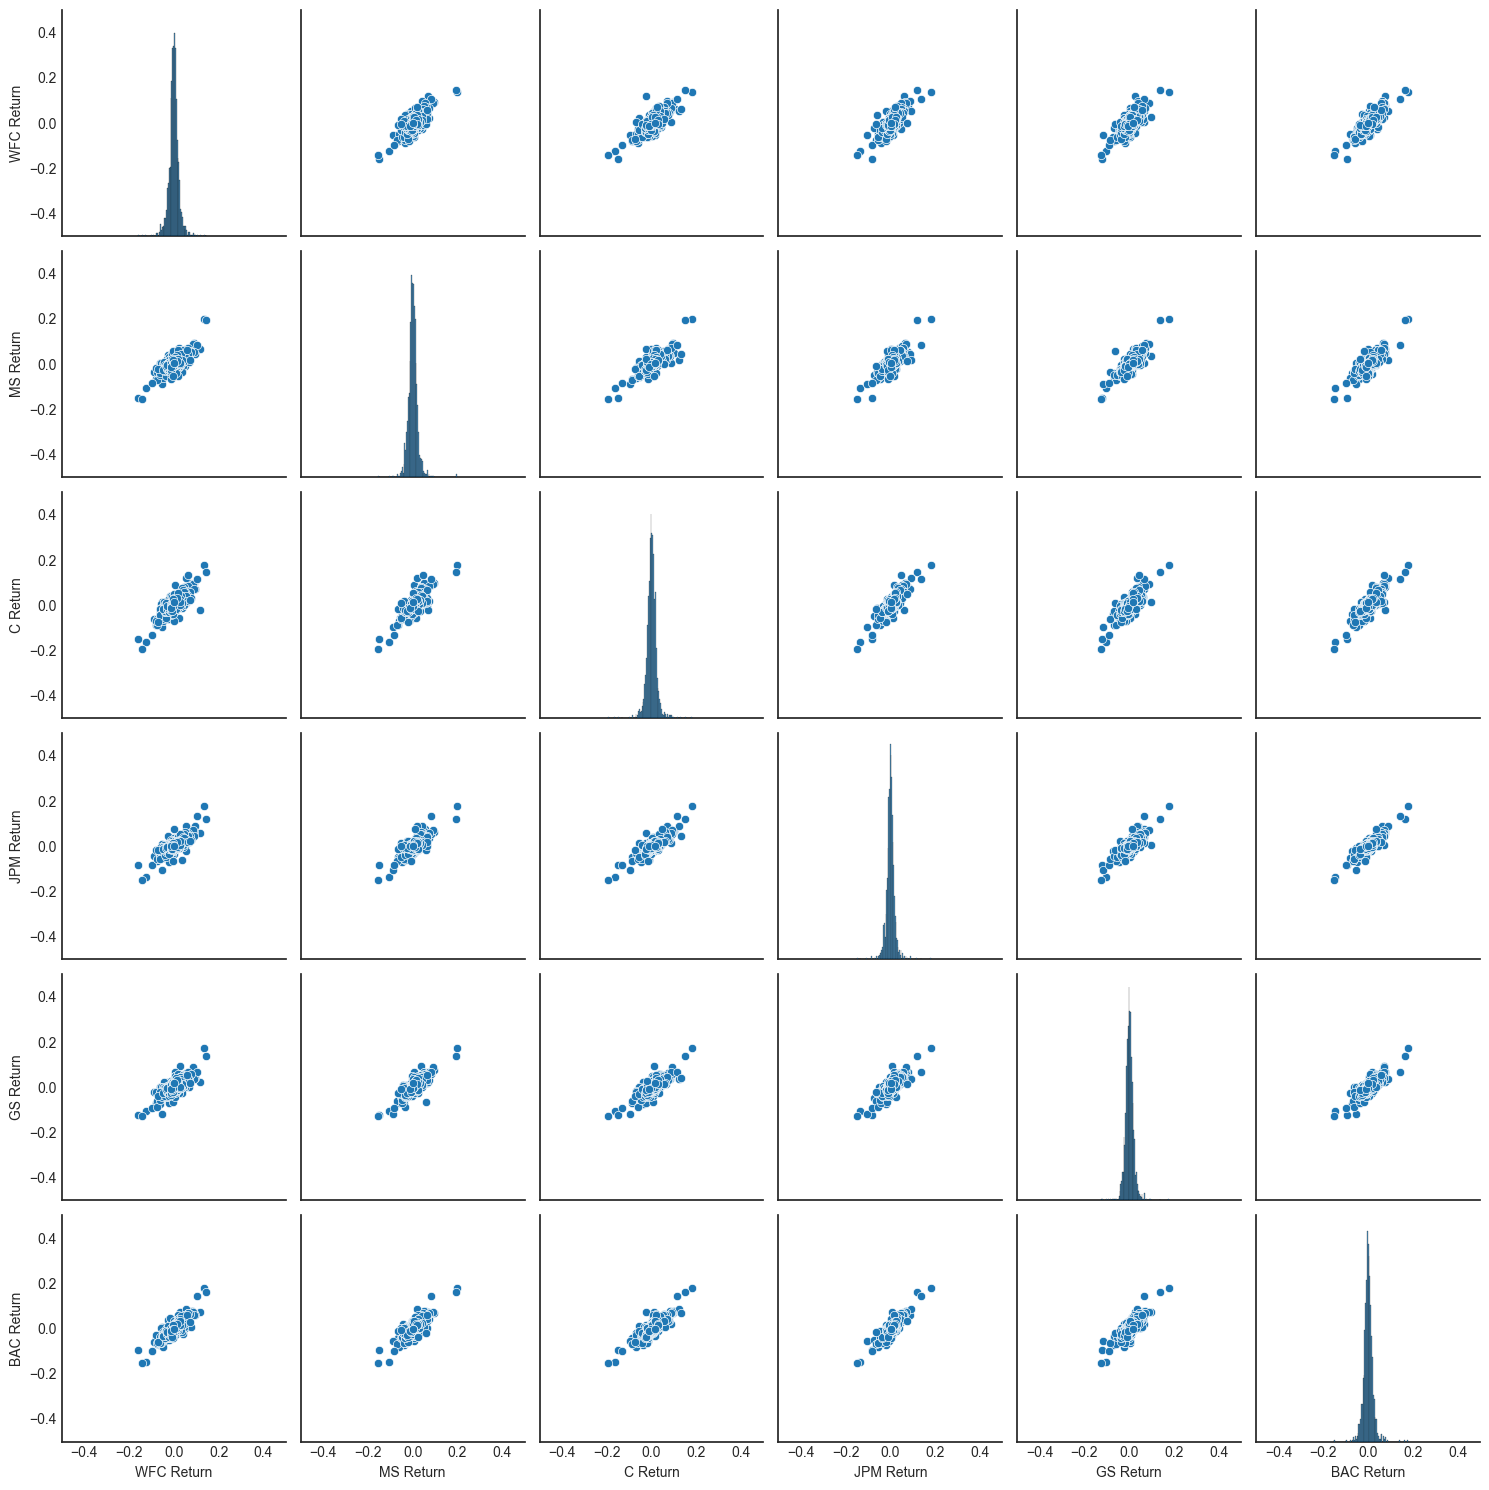

In [15]:
pairPlot = sns.pairplot(dfReturns[1:])
pairPlot.set(xlim=(-0.5,0.5))
pairPlot.set(ylim=(-0.5,0.5))
plt.tight_layout()

Let's check, when was the biggest dropdown.

In [16]:
dfReturns.idxmin()

Ticker
WFC Return   2020-03-12
MS Return    2020-03-16
C Return     2020-03-16
JPM Return   2020-03-16
GS Return    2020-03-16
BAC Return   2020-03-16
dtype: datetime64[ns]

If we were to consider adding these stocks to our portfolio, then according to the Modern Portfolio Theory by Markowitz, it would be necessary to adjust the amount of stocks in the portfolio due to volatility – in this case, the appropriate measure is the standard deviation. To make a long story short, we should proportionally add fewer of the stocks with the highest standard deviation to the portfolio than those with lower volatility.

In [17]:
dfClose.std()

Ticker
WFC     8.754444
MS     21.467305
C      11.324127
JPM    24.992223
GS     76.061301
BAC     6.356664
dtype: float64

Regardless of local price volatility, the daily dispersion of returns is similar for all positions.

In [18]:
dfReturns.std()

Ticker
WFC Return    0.023454
MS Return     0.021851
C Return      0.024048
JPM Return    0.019713
GS Return     0.020267
BAC Return    0.022111
dtype: float64

<Axes: xlabel='GS Return', ylabel='Count'>

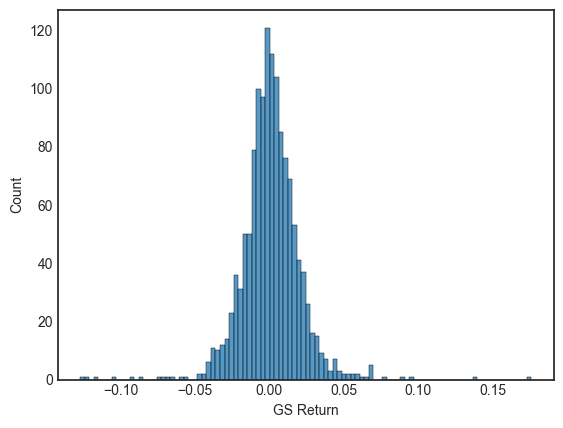

In [19]:
sns.histplot(dfReturns['GS Return'], bins=100)

<Axes: xlabel='C Return', ylabel='Count'>

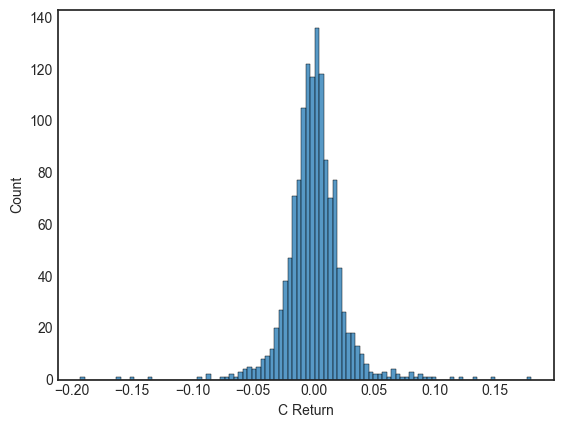

In [20]:
sns.histplot(dfReturns['C Return'], bins=100)

Let's examine the correlation between individual stocks. It is obvious that within the same sector, stocks must be correlated, but is it evenly so?

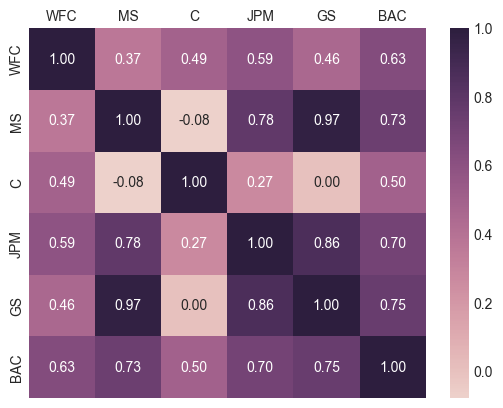

In [21]:
ht = sns.heatmap(dfClose.corr(), annot=True, fmt='.2f', cmap=sns.cubehelix_palette(as_cmap=True))
ht.set(xlabel="", ylabel="")
ht.xaxis.tick_top()

Graphically, it doesn't look the best. A good idea would be to use hierarchical clustering. It clearly shows which assets have the highest correlation. Due to the high positive correlation, the stocks in question should have their target weights in the portfolio reduced.

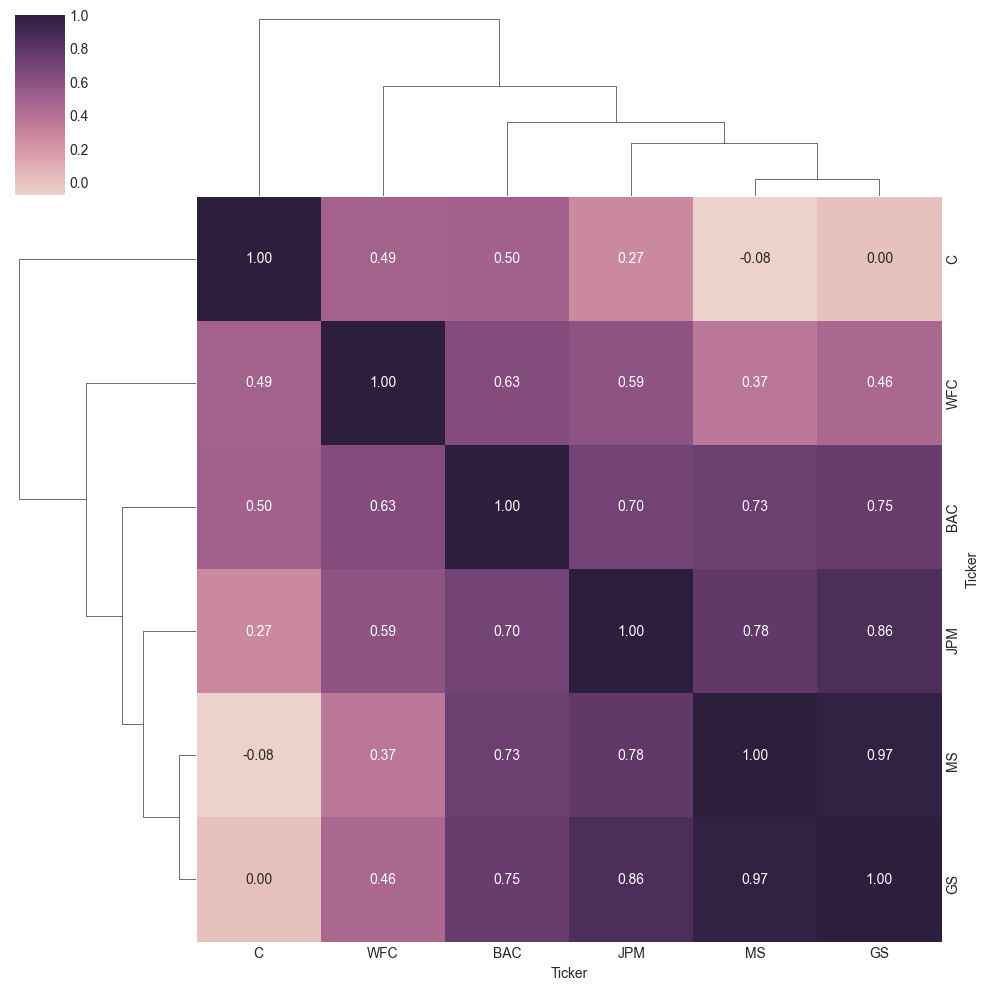

In [22]:
cm = sns.clustermap(dfClose.corr(), annot=True, fmt='.2f', cmap=sns.cubehelix_palette(as_cmap=True))

# Volatility
Volatility 
$$volatility = \sigma_{\text{minPeriods}} \times \sqrt{minPeriods}$$

is an indicator of market risk. The higher it is, the riskier it is to stay in the market.
We can clearly observe a radical jump in volatility during the 2020 pandemic.

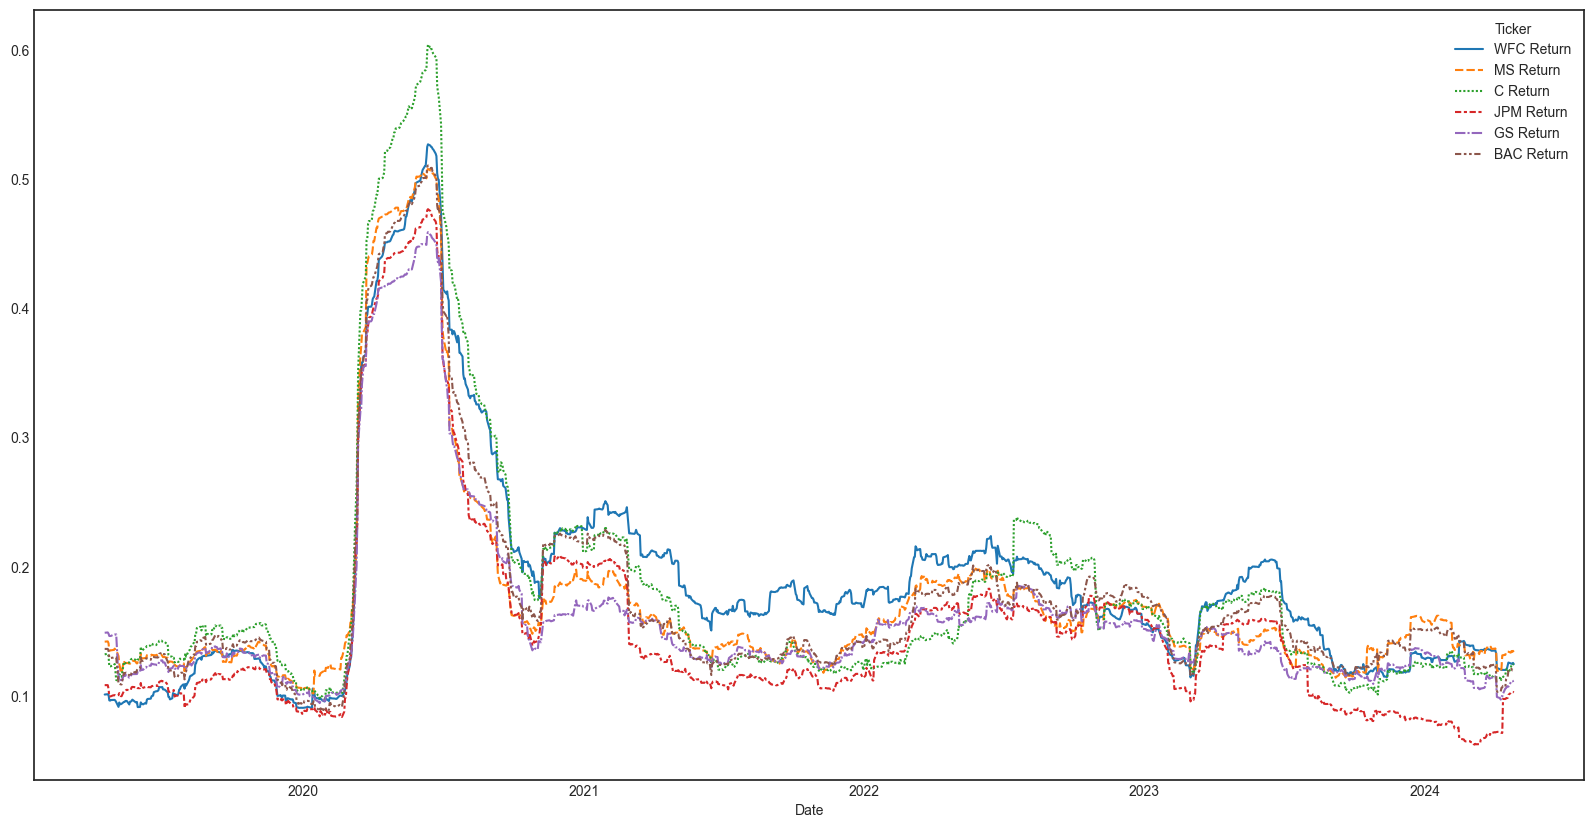

In [23]:
minPeriods = 75

vol = dfReturns.rolling(minPeriods).std() * np.sqrt(minPeriods)

plt.figure(figsize=(20,10))
sns.lineplot(vol)
sns.set(font_scale=1.5)

plt.show()

# Simple moving average analysis

Let's check how the theory of signals generated by two moving averages with different and arbitrarily chosen steps behaves in practice.

First, we need to establish the time steps for the moving averages - the shorter and the longer one - that is, from how many days the moving average will be calculated.

The most popular lengths in long-term trading are 50 and 200.

In [24]:
shortWindow = 50
shortWindowLabel = 'SMA{}'.format(shortWindow)
longWindow = 200
longWindowLabel = 'SMA{}'.format(longWindow)

## Buy/Sell signals - points where short SMA crosses long from bottom-up or up-bottom

In the practical application of two moving averages, we are interested in the signals generated by the crossing of the averages. When the average with the shorter step becomes larger than the longer one, we have a buy signal - the market's cumulative demand is greater than the long-term trend. The opposite situation occurs when the shorter average becomes smaller than the longer one - we receive a sell signal.

Buy = 1, Sell = -1, Hold = 0

In [25]:
dfClose = dfClose.copy()

dfClose['JPMsignalMark'] = 0

dfClose['smaShort'] = dfClose['JPM'].rolling(window=shortWindow, min_periods=1).mean()
dfClose['smaLong'] = dfClose['JPM'].rolling(window=longWindow, min_periods=1).mean()

# NumPy.where(): if True return 1 or -1; if False return 0
# Find the periods in which the short average is greater than the long one.

dfClose['JPMsignalMark'] = np.where(dfClose['smaShort'] > dfClose['smaLong'], 1, 0)

# NumPy.diff(): the first difference is given by out[i] = a[i+1] - a[i] along the given axis
# Find a trading signal

dfClose['JPMsignalMark'] = dfClose['JPMsignalMark'].diff()


Mark Buy/Sell has been established for variable -1/1 (SMAs crossover point), but it's linked to the actual price, highlighting that this technique generates a delay not only in time but also in price.

First iteration of simple moving analysis technique.

In [26]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [27]:
plt.style.use('seaborn-v0_8-white')

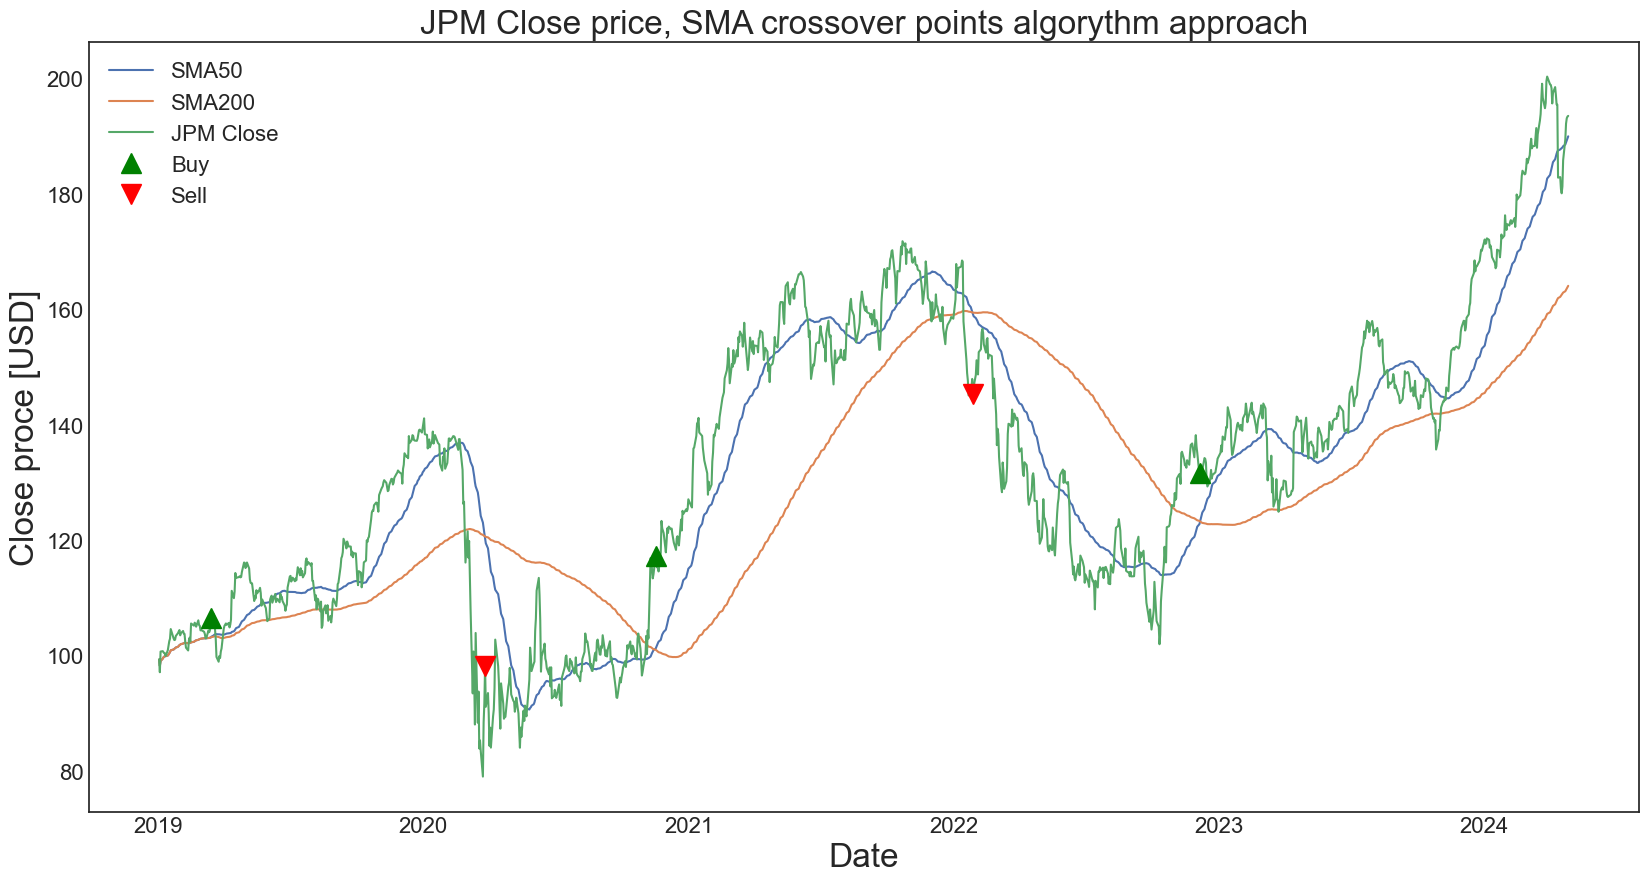

Ticker,WFC,MS,C,JPM,GS,BAC,JPMsignalMark,smaShort,smaLong
Date,,,,,,,,,
2019-03-15,50.660000,43.330002,65.190002,106.550003,198.259995,29.299999,1.0,103.269200,103.191569
2020-03-26,30.900000,35.709999,46.020000,98.120003,165.789993,22.719999,-1.0,120.359200,120.644200
2020-11-16,24.900000,58.110001,50.400002,117.300003,222.380005,27.580000,1.0,101.206000,101.005950
2022-01-27,53.759998,101.150002,64.150002,145.309998,341.029999,45.470001,-1.0,159.156801,159.419850
2022-12-06,43.400002,87.510002,44.980000,131.589996,362.910004,33.000000,1.0,123.259999,123.222800


In [28]:
plt.figure(figsize=(20,10))

plt.plot(dfClose.index, dfClose['smaShort'],label=shortWindowLabel)
plt.plot(dfClose.index, dfClose['smaLong'],label=longWindowLabel)
plt.plot(dfClose.index, dfClose['JPM'],label='JPM Close')

plt.plot(dfClose.loc[dfClose['JPMsignalMark'] == 1].index, dfClose['JPM'].loc[dfClose['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
plt.plot(dfClose.loc[dfClose['JPMsignalMark'] == -1].index, dfClose['JPM'].loc[dfClose['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

plt.title('JPM Close price, SMA crossover points algorythm approach', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Close proce [USD]', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(loc='upper left', fontsize='16')
plt.show()

(dfClose.loc[(dfClose['JPMsignalMark'] == 1) | (dfClose['JPMsignalMark'] == -1)])


## Counting total return from hypothetical investment

In [29]:
initialCapital = 10000 # USD

dfClose['DailyReturns'] = dfClose['JPM'].pct_change()
dfClose['OnMarket'] = 0
dfClose.loc[dfClose['smaShort'] > dfClose['smaLong'], 'OnMarket'] = 1

dfClose['OnMarketReturns'] = dfClose['DailyReturns'] * dfClose['OnMarket'].shift(1) # Transaction is set the day after signal
dfClose['CumulativeProfit'] = (1 + dfClose['OnMarketReturns']).cumprod() * initialCapital
dfClose['StrategyCumulative'] = (1 + dfClose['OnMarketReturns']).cumprod() * dfClose['JPM'].iloc[0]

dfClose.fillna(0, inplace=True)
dfClose.head()


Ticker,WFC,MS,C,JPM,GS,BAC,JPMsignalMark,smaShort,smaLong,DailyReturns,OnMarket,OnMarketReturns,CumulativeProfit,StrategyCumulative
Date,,,,,,,,,,,,,,
2019-01-02,46.939999,40.400002,53.529999,99.309998,172.029999,24.959999,0.0,99.309998,99.309998,0.000000,0,0.0,0.0,0.000000
2019-01-03,46.570000,39.680000,52.560001,97.110001,169.509995,24.559999,0.0,98.209999,98.209999,-0.022153,0,-0.0,10000.0,99.309998
2019-01-04,47.950001,41.299999,55.130001,100.690002,175.050003,25.580000,0.0,99.036667,99.036667,0.036865,0,0.0,10000.0,99.309998
2019-01-07,47.639999,41.709999,55.610001,100.760002,176.020004,25.559999,0.0,99.467501,99.467501,0.000695,0,0.0,10000.0,99.309998
2019-01-08,47.540001,41.450001,55.459999,100.570000,175.369995,25.510000,0.0,99.688000,99.688000,-0.001886,0,-0.0,10000.0,99.309998


In [30]:
dfClose['Date'] = dfClose.index

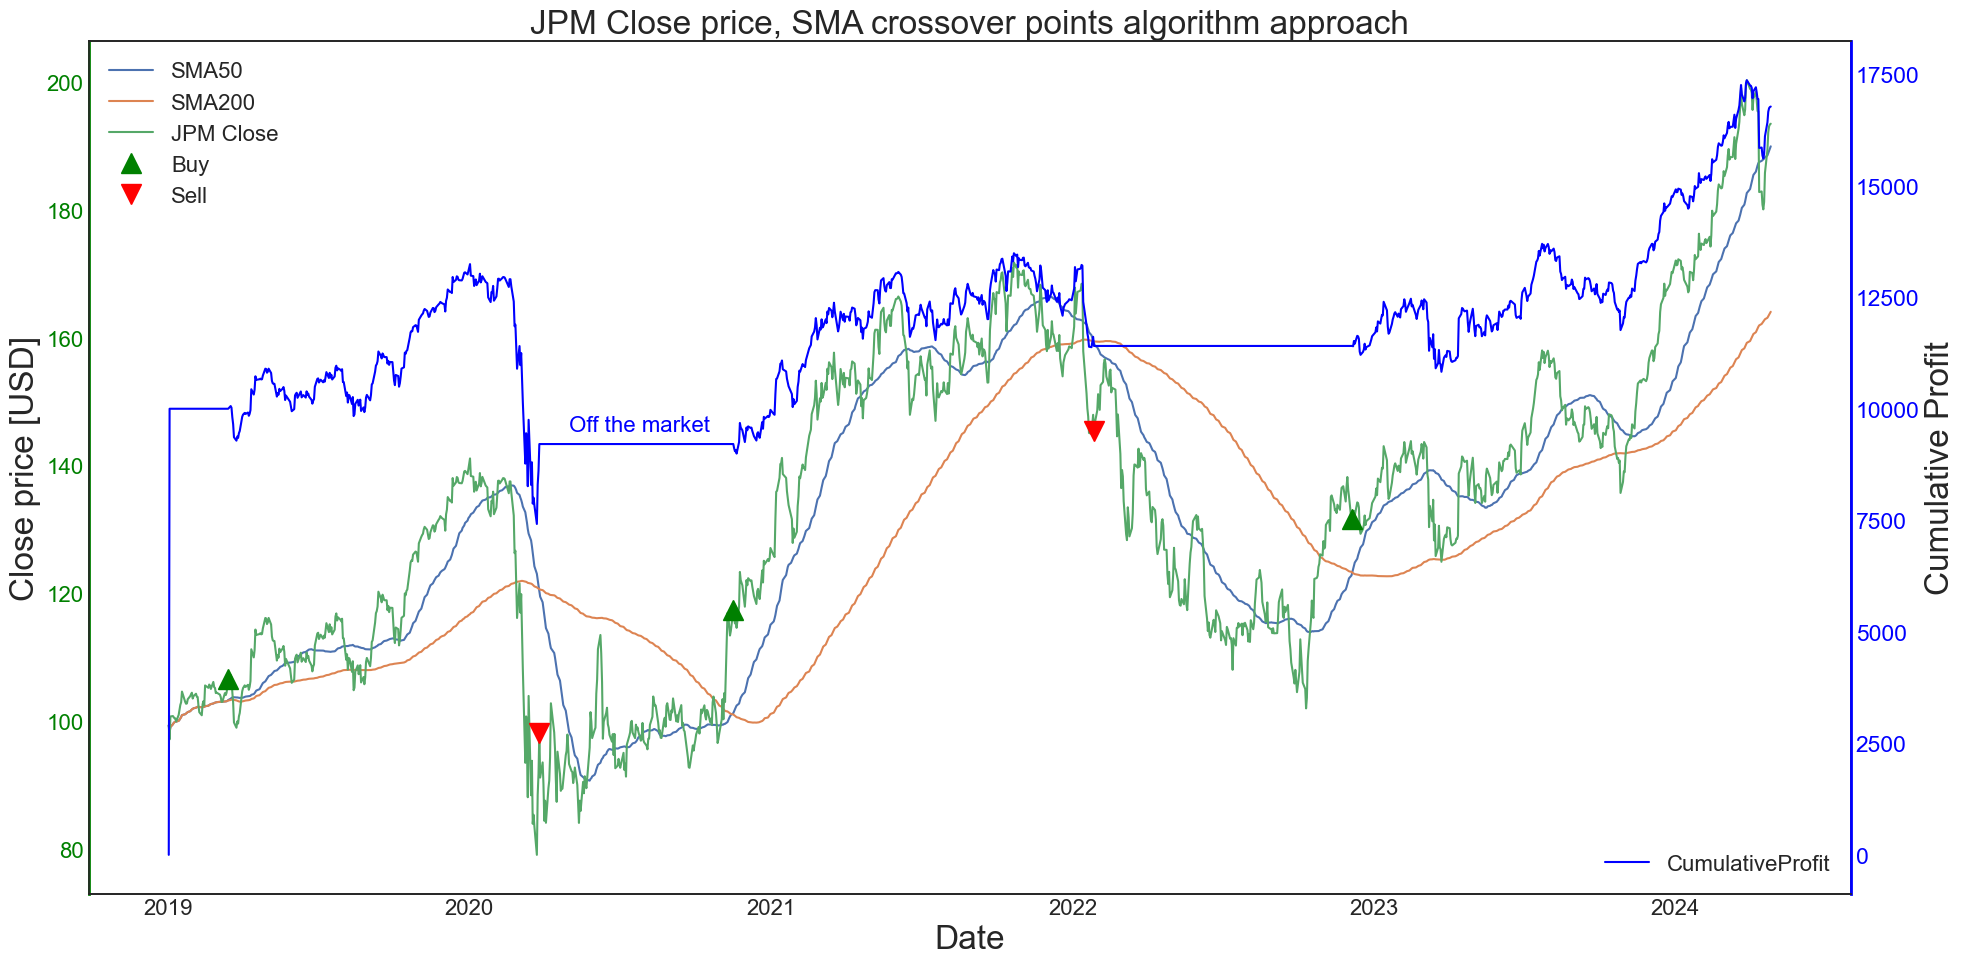

- Strategy pct. return 167.74% vs Buy and hold pct. return 194.83%

- Initial capital was 10000 USD, and cumulative profit amounted to 6774.02 USD; 
which gives a total amount equal to 16774.02 USD


In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax1 = plt.gca()

ax1.plot(dfClose.index, dfClose['smaShort'], label=shortWindowLabel)
ax1.plot(dfClose.index, dfClose['smaLong'], label=longWindowLabel)
ax1.plot(dfClose.index, dfClose['JPM'], label='JPM Close')
# ax1.plot(dfClose.index, dfClose['StrategyCumulative'])

ax1.plot(dfClose.loc[dfClose['JPMsignalMark'] == 1].index, dfClose['JPM'].loc[dfClose['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax1.plot(dfClose.loc[dfClose['JPMsignalMark'] == -1].index, dfClose['JPM'].loc[dfClose['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

ax1.set_xlabel('Date', fontsize=24)
ax1.set_ylabel('Close price [USD]', fontsize=24)
ax1.tick_params(labelsize=16)
ax1.legend(loc='upper left', fontsize='16')
ax1.spines['left'].set_color('green')
ax1.spines['left'].set_linewidth(2)
ax1.tick_params(axis='y', colors='green', width=2)

ax2 = ax1.twinx()
ax2.plot(dfClose.index, dfClose['CumulativeProfit'], label='CumulativeProfit', color='blue')
ax2.set_ylabel('Cumulative Profit', fontsize=24)
ax2.legend(loc='lower right', fontsize='16')
ax2.spines['right'].set_color('blue')
ax2.spines['right'].set_linewidth(2)
ax2.tick_params(axis='y', colors='blue', width=2)

ax2.annotate(
    'Off the market', 
    xy=(dfClose['Date'].loc['2020-05-01'], 9500), 
    xytext=(dfClose['Date'].loc['2020-05-01'], 9500),
    fontsize=16, color='blue'
)

plt.title('JPM Close price, SMA crossover points algorithm approach', fontsize=24)
plt.tight_layout()
plt.show()

buy_and_hold_pct = (dfClose['JPM'].iloc[-1] / dfClose['JPM'].iloc[0]) * 100
strategy_pct = (dfClose['StrategyCumulative'].iloc[-1] / dfClose['JPM'].iloc[0]) * 100

print(f"- Strategy pct. return {round(strategy_pct, 2)}% vs Buy and hold pct. return {round(buy_and_hold_pct, 2)}%")
print()
print(f"- Initial capital was {initialCapital} USD, and cumulative profit amounted to {round(dfClose['CumulativeProfit'].iloc[-1] - initialCapital, 2)} USD; \nwhich gives a total amount equal to {round(dfClose['CumulativeProfit'].iloc[-1], 2)} USD")

# Expotential moving average